In [15]:
def preprocess_features(hepatitis_dataframe_new):
    selected_features = hepatitis_dataframe_new                   
    processed_features = selected_features.copy()
    return processed_features

def preprocess_targets(hepatitis_dataframe_new):
    output_targets = hepatitis_dataframe_new["Category"]
    return output_targets

In [16]:
train = len(hepatitis_dataframe[:400])
validation = len(hepatitis_dataframe[400:])

In [17]:
# Choose examples for training.
training_examples = preprocess_features(hepatitis_dataframe[:train])
training_targets = preprocess_targets(hepatitis_dataframe[:train])
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose examples for validation.
validation_examples = preprocess_features(hepatitis_dataframe[validation:])
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(hepatitis_dataframe[validation:])

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())


print(validation_examples.shape)
print(validation_targets.shape)



Training examples summary:


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-2.8,-1.3,-4.4,-2.0,-1.0,-0.7,-0.6,-2.9,-3.5,-1.2,-0.6,-4.9
25%,-0.4,-0.8,-1.3,-0.4,-0.6,-0.5,-0.4,-0.3,-0.5,-0.7,-0.3,-0.4,-0.5
50%,-0.4,-0.0,0.8,0.1,-0.1,-0.2,-0.3,-0.2,0.0,-0.0,-0.1,-0.3,0.0
75%,-0.4,0.7,0.8,0.6,0.4,0.2,-0.1,0.0,0.6,0.6,0.1,0.0,0.6
max,3.2,2.9,0.8,6.8,12.1,10.3,7.9,14.4,3.5,3.4,16.4,9.6,3.2


Validation examples summary:


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
mean,-0.1,0.0,-0.0,0.0,-0.1,-0.1,-0.1,0.0,-0.0,0.1,-0.1,-0.1,-0.0
std,0.9,1.0,1.0,1.0,0.8,0.9,0.8,1.4,0.9,1.0,0.4,0.8,1.0
min,-0.4,-2.4,-1.3,-4.4,-1.8,-1.0,-0.7,-0.6,-2.9,-2.4,-1.2,-0.6,-4.5
25%,-0.4,-0.8,-1.3,-0.5,-0.6,-0.5,-0.4,-0.3,-0.5,-0.6,-0.3,-0.4,-0.5
50%,-0.4,0.1,0.8,0.1,-0.1,-0.2,-0.3,-0.2,0.0,-0.0,-0.1,-0.3,0.0
75%,-0.4,0.8,0.8,0.6,0.4,0.1,-0.1,-0.0,0.5,0.7,0.1,-0.1,0.6
max,3.2,3.0,0.8,6.8,4.9,10.3,6.3,14.4,3.5,3.9,6.6,7.1,2.6


Training targets summary:


count   400.0
mean      0.4
std       1.1
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       4.0
Name: Category, dtype: float64

Validation targets summary:


count   400.0
mean      0.3
std       1.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       4.0
Name: Category, dtype: float64

(400, 13)
(400,)


In [18]:
print("Shape of training examples:",training_examples.shape)
print("Shape of training targets:",training_targets.shape)

Shape of training examples: (400, 13)
Shape of training targets: (400,)


In [19]:
training_examples.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
564,2.3,-1.8,0.8,-0.1,-0.9,-1.0,1.3,-0.3,1.4,0.1,-0.5,1.4,-1.0
19,-0.4,-1.4,0.8,0.1,-0.2,0.1,-0.1,0.0,-0.5,-1.1,0.4,-0.4,-0.7
495,-0.4,0.9,-1.3,-1.4,-0.5,-0.5,-0.4,-0.2,-1.1,-1.3,-0.5,-0.4,-1.6
419,-0.4,-0.0,-1.3,-1.0,-1.1,-0.4,-0.5,-0.4,-1.7,0.2,-0.1,-0.5,-1.1
209,-0.4,0.4,0.8,0.2,-0.0,-0.4,-0.2,-0.2,3.1,-0.2,-0.0,-0.2,1.0


Naive model

In [103]:
# Model 1 - Naive Model without any NN. Here highest class frequency
Model1 = max(pd.value_counts(hepatitis_dataframe.Category))*100/(len(hepatitis_dataframe.Category))
Model1

86.66666666666667

In [165]:
#Model 1 with 1 hidden layer and 1 output layer
baseline_model1 = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(5, activation=tf.nn.relu,)

  ])

baseline_model1.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model1.summary()

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 300
b_history1 = baseline_model1.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_70 (Dense)             (None, 5)                 165       
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................
....................................................................................................

In [166]:
max(b_history1.history['val_accuracy']) 

0.8774999976158142

In [167]:
max(b_history1.history['accuracy']) 

0.8525000214576721

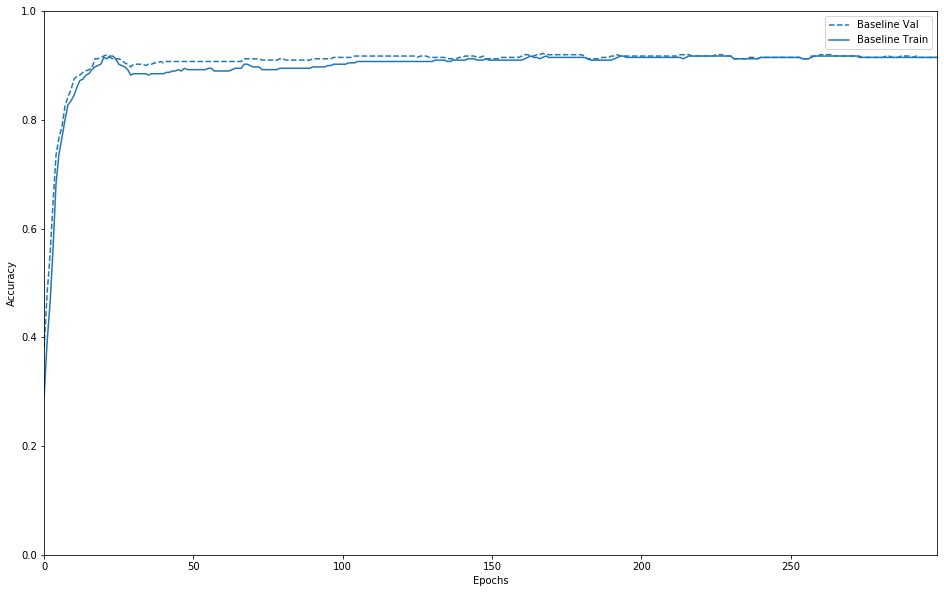

In [106]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0,1])

plot_history([('baseline', b_history1)])


In [168]:
#Model 2 with 2 hidden layer and 1 output layer
baseline_model2 = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu,),
    keras.layers.Dense(5, activation=tf.nn.relu,)

  ])


baseline_model2.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model2.summary()
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 300
b_history2 = baseline_model2.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_72 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_73 (Dense)             (None, 5)                 165       
Total params: 1,669
Trainable params: 1,669
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................
....................................................................................................

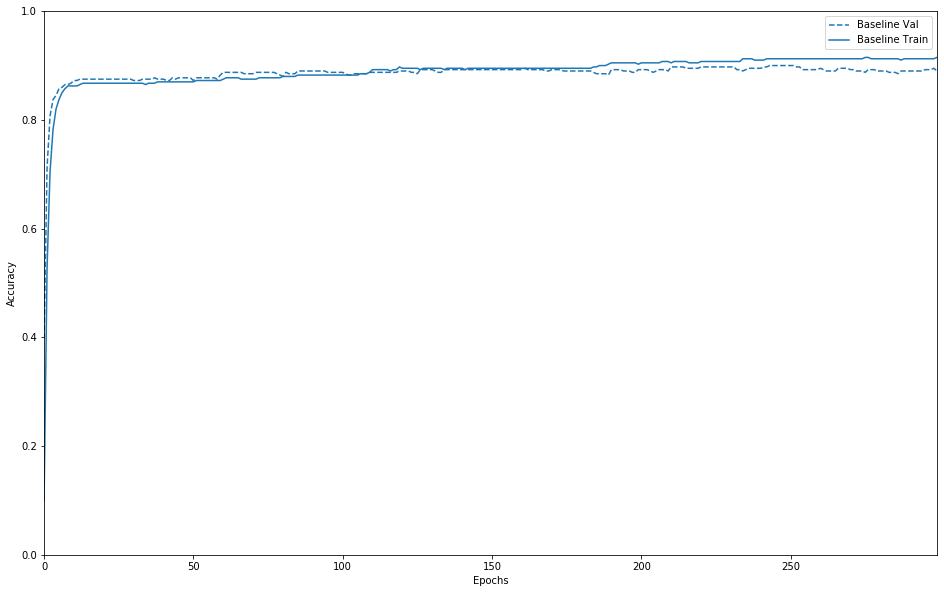

In [169]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history2)])

In [170]:
#Accuracy of the model 2
max(b_history2.history['val_accuracy'])

0.8999999761581421

In [171]:
max(b_history2.history['accuracy'])

0.9150000214576721

Q3. Analysis

NN Model 1 & 2 has been created to compare between 1 Hidden Layer vs 2 Hidden Layers.

The Model 1 with 1 hidden layer gives a val_accuracy of 87.7% & Model 2 with 2 hidden layers gives a val_accuracy of 89.9%.

The Model 2 has higher accuracy rate and has lower generalization error. Hence the model with 2 hidden layers gives a better accuracy for this dataset.






Question 2B
(a) 2/3 the size of the input layer, plus the size of the output layer

In [130]:
#Model 2 with 2 hidden layer and 1 output layer
baseline_model3 = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(26, activation=tf.nn.relu,),
    keras.layers.Dense(5, activation=tf.nn.relu,)

  ])


baseline_model3.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model3.summary()

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 300
b_history3 = baseline_model3.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_39 (Dense)             (None, 26)                858       
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 135       
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................
....................................................................................................

In [131]:
max(b_history3.history['val_accuracy']) 

0.8849999904632568

In [132]:
max(b_history3.history['accuracy']) 

0.8675000071525574

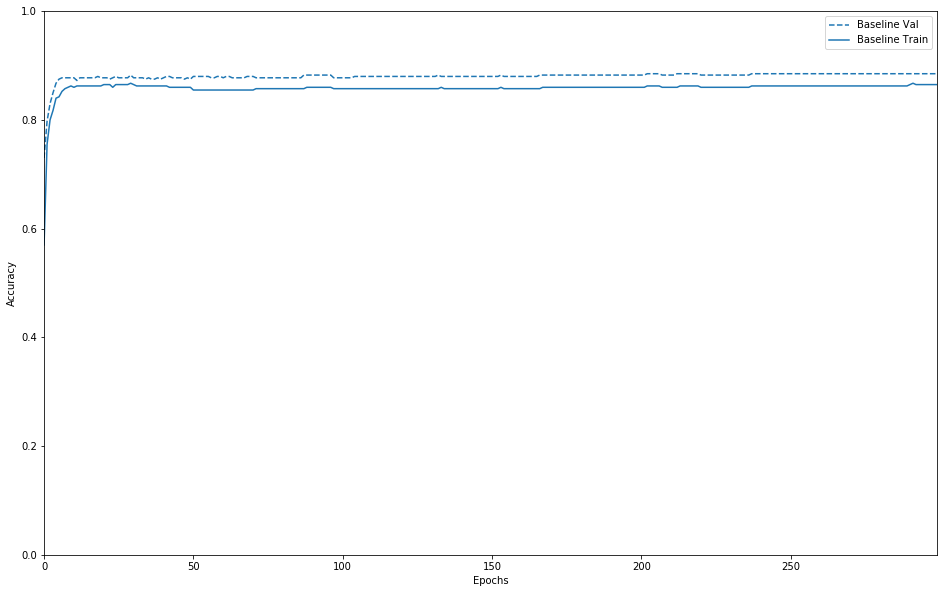

In [133]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history3)])


(b) twice the size of the input layer

In [135]:

baseline_model4 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu,),
    keras.layers.Dense(5, activation=tf.nn.relu,)

  ])


baseline_model4.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model4.summary()

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 300
b_history4 = baseline_model4.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)             (None, 5)                 165       
Total params: 3,141
Trainable params: 3,141
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................
....................................................................................................

In [136]:
print(max(b_history4.history['val_accuracy']))
print(max(b_history4.history['accuracy']))

0.9125000238418579
0.8974999785423279


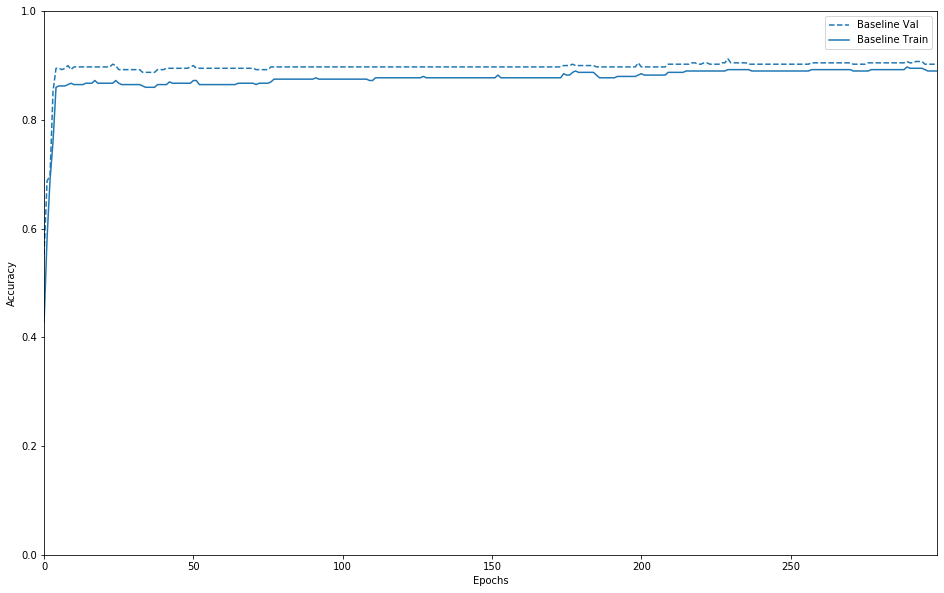

In [138]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history4)])

Comparision of No of neurons in hidden layers between 2 Models

Model 3 has number of neurons 
a)2/3 the size of the input layer, plus the size of the output layer 

Model 4 has number of neurons 
b) twice the size of the input layer.

Model 3 has a val_accuracy of 88.4% and model 4 has a val_accuracy of 91.2%. With the increase in the number of nuerons the capacity of the model also increases. Hence model 4 has performed better then model 3.

In [139]:
#### Question 2.C
#Reguralization 
l1_model = keras.Sequential([
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
  ])

l1_model.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])

l2_model = keras.Sequential([
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
  ])

l2_model.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])


In [140]:
l1_history = l1_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])
l2_history = l2_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [141]:
# accuracies for L1 & L2
print(max(l1_history.history['val_accuracy']))
print(max(l2_history.history['accuracy']))

1.0
0.8525000214576721


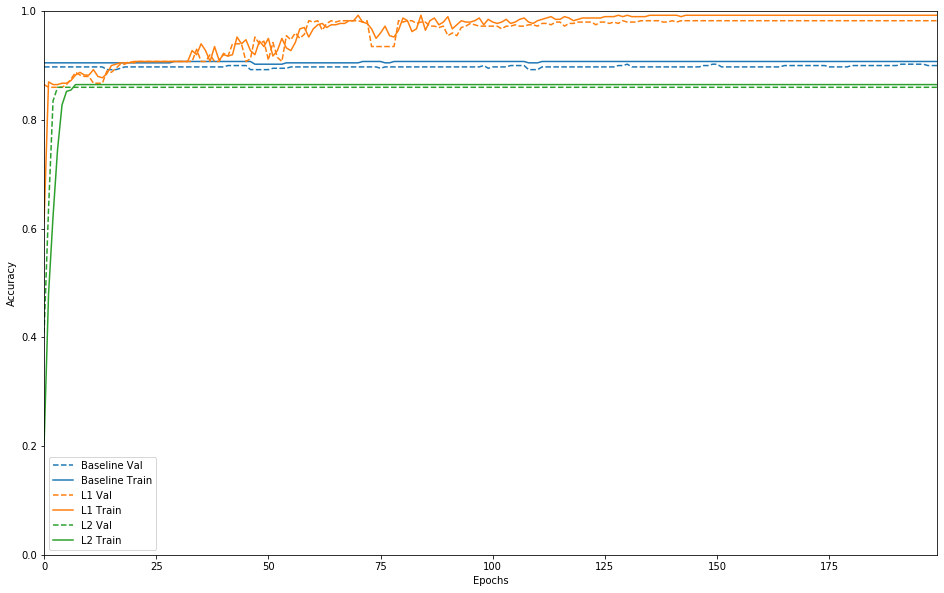

In [378]:
plot_history([('baseline', b_history),
              ('L1', l1_history),
              ('L2', l2_history)])

Question 3 Analysis

Here the neural network model are performing better than naive models, and giving better accuracies.

But, in the graphs of neural network models, eventhough there is difference in parameters, generalization gap is still there.

When we regularize the model using L1 & L2 techniques, it helps to reduce the weights and reduce the gaps.
we can observe in the graphs of L1 and L2 regularization, the generalization gap is very small.

In [142]:
#Activation function - ReLU
#Model 5 with 2 hidden layer and 1 output layer with activation function as relu
baseline_model5 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(25, activation=tf.nn.relu,),
    keras.layers.Dense(5, activation=tf.nn.relu,)

  ])

baseline_model5.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model5.summary()

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 200
b_history5 = baseline_model5.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_58 (Dense)             (None, 25)                1625      
_________________________________________________________________
dense_59 (Dense)             (None, 5)                 130       
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................

In [143]:
print(max(b_history5.history['val_accuracy']))
print(max(b_history5.history['accuracy']))

0.8949999809265137
0.8824999928474426


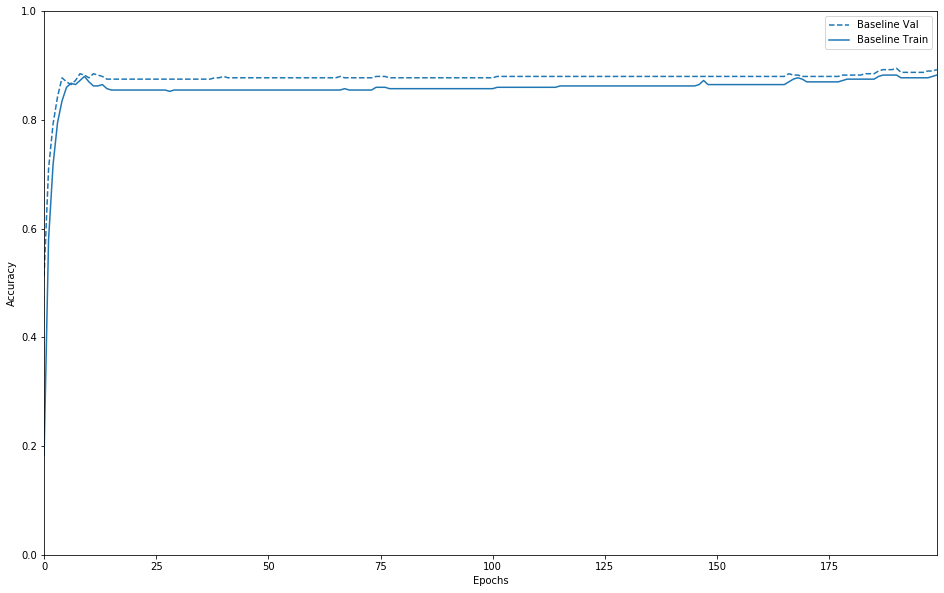

In [144]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0,1])

plot_history([('baseline', b_history5)])

In [145]:
#Activation function - Softmax
#Model 6 with 2 hidden layer and 1 output layer with activation function as softmax
baseline_model6 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.softmax,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(25, activation=tf.nn.softmax,),
    keras.layers.Dense(5, activation=tf.nn.softmax,)

  ])


baseline_model6.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model6.summary()

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 200
b_history6 = baseline_model6.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()]) 

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_61 (Dense)             (None, 25)                1625      
_________________________________________________________________
dense_62 (Dense)             (None, 5)                 130       
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................

In [146]:
print(max(b_history6.history['val_accuracy']))

0.9100000262260437


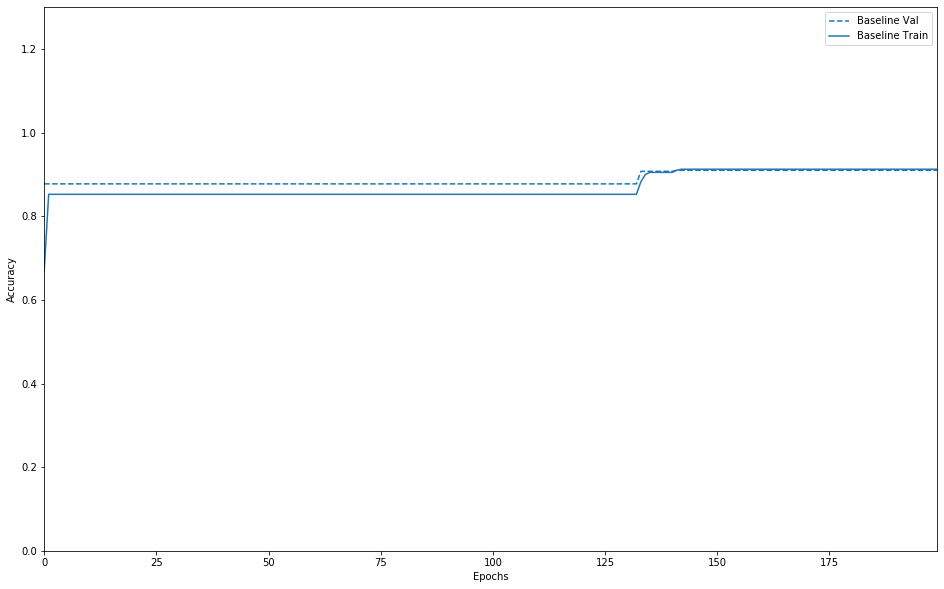

In [148]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1.3])

plot_history([('baseline', b_history6)])

Question 3 Analysis

Model 5 has activation function - relu and the accuracy for model 89%

Mmodel 6 has activation function - softmax and the accuracy for model 91%

Hence we can conclude that Model 6 with activation function as softmax is performing better than then the other model.

In [ ]:
# shows the validation done on the validation examples of the Liver Dataset.
valpreds = baseline_model6.predict_on_batch(validation_examples)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(validation_targets)